In [1]:
## binning stuffs 
import pandas as pd
import numpy as np

import matplotlib
# %matplotlib inline
from pylab import *

import geopandas as gpd
from pprint import pprint
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [2]:
file_dir = '/Users/tianyiyang/Downloads/TeamConflict/'
conflict_data_total = pd.read_csv(file_dir+'conflict_data_acled_2018_2021.csv')

In [3]:
conflict_data_total.shape

(680212, 31)

In [4]:
np.unique(conflict_data_total['year'])

array([2018, 2019, 2020, 2021])

In [5]:
# from datetime import datetime

# def days_between(d1, d2):
#     d1 = datetime.strptime(d1, "%d %B %Y")
#     d2 = datetime.strptime(d2, "%d %B %Y")
#     return ((d2 - d1).days)

In [6]:
event_date_all = np.asarray(conflict_data_total['event_date'])
fatalities_all = conflict_data_total['fatalities']
event_type_all = conflict_data_total['event_type']
latitude_all = np.asarray(conflict_data_total['latitude'])
longitude_all = np.asarray(conflict_data_total['longitude'])
unique_event_type_total = np.unique(event_type_all)

In [7]:
# covid_19_start_datestr = '17 November 2019'
# print(event_date_all.shape)

In [8]:
# %%time

# date_differece = np.zeros((len(event_date_all)))

# for eventi in range(0, len(event_date_all)):
#     date_differece[eventi] = days_between(covid_19_start_datestr, event_date_all[eventi])

In [9]:
# print("# of event happened before pandemic: ", len(event_date_all[date_differece<=0]))
# print("# of event happened after pandemic: ", len(event_date_all[date_differece>0]))

In [10]:
# event_type_bef = np.asarray(event_type_all[date_differece<=0])
# event_type_aft = np.asarray(event_type_all[date_differece>0])

# fatalities_bef = fatalities_all[date_differece<=0]
# fatalities_aft = fatalities_all[date_differece>0]

In [11]:
# plt.hist(fatalities_bef[fatalities_bef<10],bins=50,label='facilities_bef',alpha=0.8,histtype='step')
# plt.hist(fatalities_aft[fatalities_aft<10],bins=50,label='fatalities_aft',alpha=0.8,histtype='step')

# plt.legend()
# plt.ylabel('N',fontsize=18)

In [12]:
# country_nom = 'Ukraine'
# diff_type_bef = []
# diff_type_aft = []

# for typei in range(0, len(unique_event_type_total)):
    
    
#     arg_match_bef = np.argwhere((event_type_bef==unique_event_type_total[typei])&(np.asarray(conflict_data_total['country'])[date_differece<=0] == country_nom)).flatten()
#     arg_match_aft = np.argwhere((event_type_aft==unique_event_type_total[typei])&(np.asarray(conflict_data_total['country'])[date_differece>0] == country_nom)).flatten()
    
#     diff_type_bef += list([len(arg_match_bef)])
#     diff_type_aft += list([len(arg_match_aft)])
    

In [13]:
# plt.figure(figsize=(26,10))
# plt.rc('xtick', labelsize=18) 
# plt.rc('ytick', labelsize=18)


# width = 0.6

# event_happened_bef = diff_type_bef
# event_happened_aft = diff_type_aft
# indices = np.arange(len(event_happened_bef))
# LABELS = unique_event_type_total

# plt.bar(indices, event_happened_bef, width=width, 
#         color='b', alpha=0.5, label='Before pandemic')
# plt.bar([i+0.25*width for i in indices], event_happened_aft, 
#         width=0.5*width, color='r', label='After pandemic')
# plt.xticks(indices, LABELS)
# plt.ylabel('Event Number', fontsize = 20)

# plt.legend(fontsize = 25)
# plt.show()

In [14]:
event_date_total_ymd =pd.to_datetime(conflict_data_total['event_date'],infer_datetime_format=True)

In [15]:
happened_month = []

for datei in range(0,len(event_date_total_ymd)):
    
    happened_month += list( [int(str(event_date_total_ymd[datei])[5:7])] )

In [16]:
conflict_data_total['happened_month'] = happened_month

In [17]:
conflict_data_total

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,happened_month
0,7767296,32,ARG7124,7124,26 March 2021,2021,1,Protests,Peaceful protest,Protesters (Argentina),...,-41.1335,-71.3103,1,El Cordillerano,Subnational,"On 26 March 2021, in San Carlos de Bariloche (...",0,1617033264,ARG,3
1,7767808,887,YEM63695,63695,26 March 2021,2021,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,15.5381,45.1357,2,Al Masdar; Nukhba Hadramawt,National,"On 26 March 2021, pro-Hadi and Houthi forces c...",1,1617039259,YEM,3
2,7768064,222,SLV2499,2499,26 March 2021,2021,1,Battles,Armed clash,MS-13: Mara Salvatrucha,...,13.7333,-88.8833,2,El Salvador.com,National,"On 26 March 2021, in San Rafael Cedros municip...",1,1617047503,SLV,3
3,7787008,642,ROU1529,1529,26 March 2021,2021,1,Protests,Peaceful protest,Protesters (Romania),...,46.5500,24.5667,1,Adevarul,National,"On 26 March 2021, cultural workers and artists...",0,1617121993,ROM,3
4,7788032,756,CHE198,198,26 March 2021,2021,1,Protests,Peaceful protest,Protesters (Switzerland),...,46.5197,6.6323,1,24 Heures,National,"On 26 March 2021, about 1,500 people, among th...",0,1617132585,CHE,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680207,5618430,804,UKR2798,2798,27 March 2018,2018,1,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Ukraine (2014-2019),...,47.2972,37.9076,2,Donetsk News Agency,Subnational,"On 27 March 2018, Military Forces of Ukraine f...",0,1563902418,UKR,3
680208,7748863,76,BRA31583,31583,27 March 2018,2018,1,Protests,Peaceful protest,Protesters (Brazil),...,-23.5735,-46.7048,1,G1,National,"On 27 March 2018, in the west zone of Sao Paul...",0,1615851810,BRA,3
680209,7364351,76,BRA22140,22140,27 March 2018,2018,1,Protests,Peaceful protest,Protesters (Brazil),...,-23.0067,-44.3181,1,G1,National,"On 27 March 2018, in Angra dos Reis (Rio de Ja...",0,1607554981,BRA,3
680210,6840575,4,AFG36543,36543,27 March 2018,2018,1,Battles,Armed clash,Taliban,...,36.8648,70.8342,2,Voice of Jihad,Other,"On March 27th, a soldier was killed and anothe...",0,1580846985,AFG,3


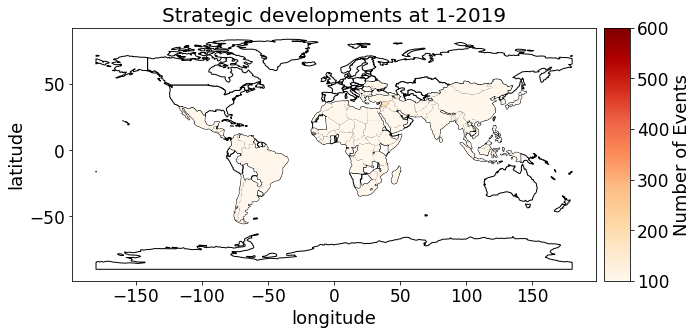

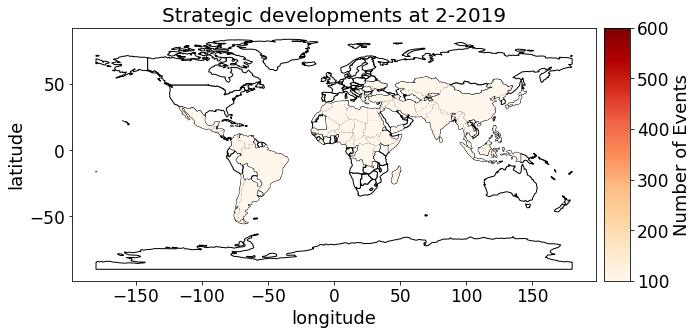

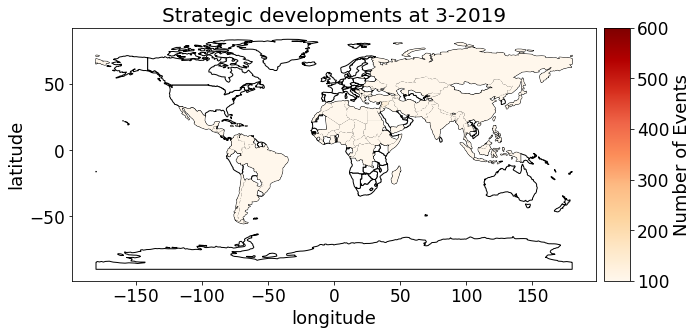

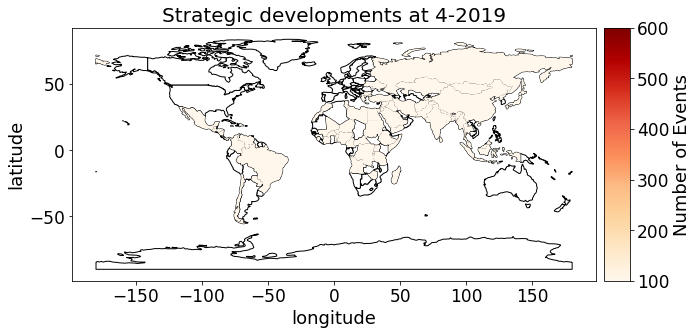

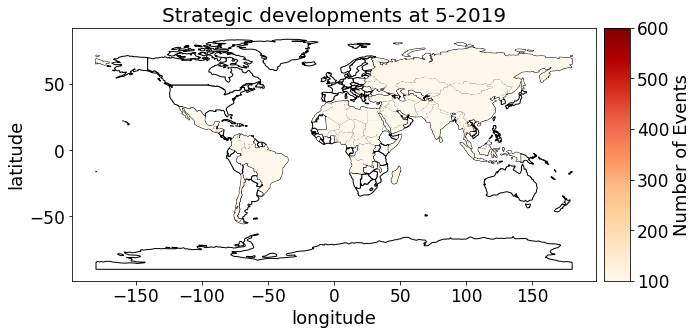

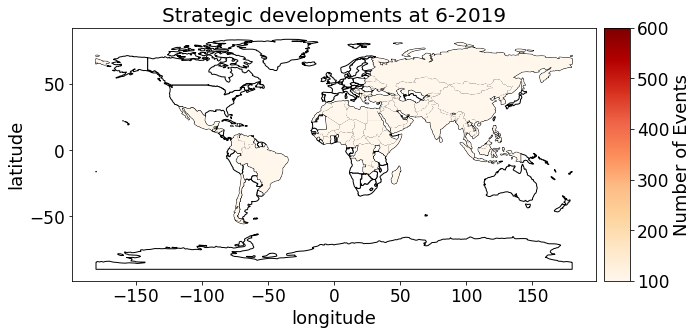

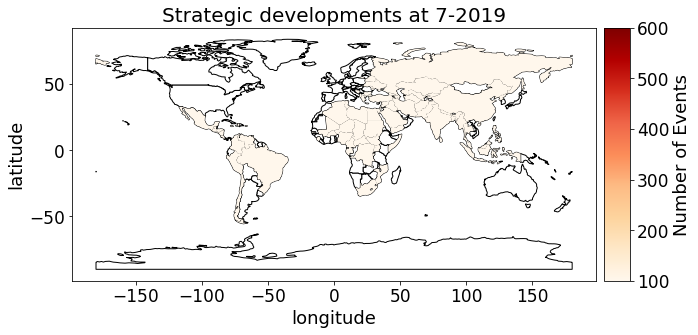

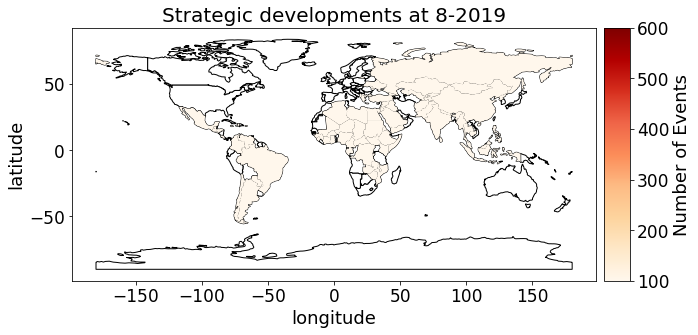

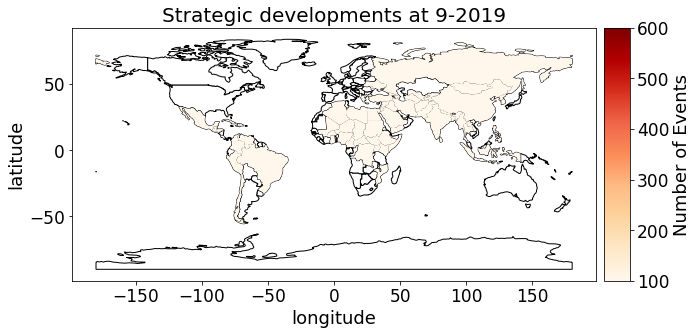

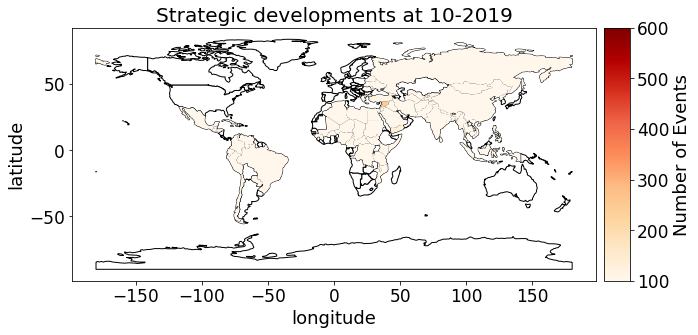

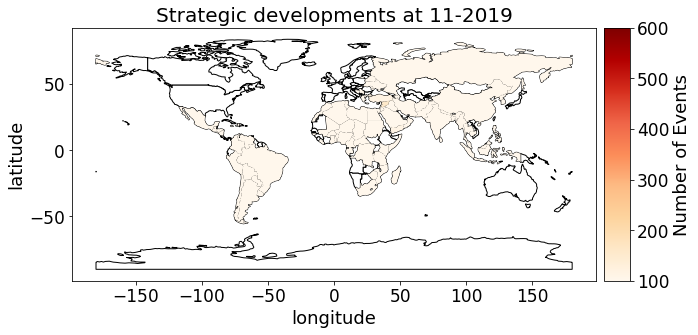

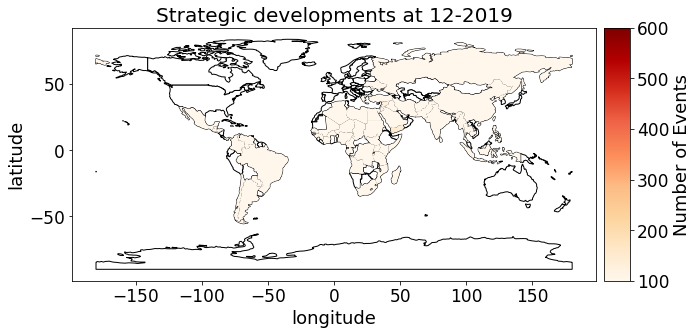

In [115]:
matplotlib.rc('xtick', labelsize=17) 
matplotlib.rc('ytick', labelsize=17)
matplotlib.rc('font', size=18)

def addMapToAx(ax):
    """
    Plot events on a map
    Parameters:
        ax
    Returns:
    """
    world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

    base = world.plot(ax=ax,color='white', edgecolor='black')
    ax.set_aspect('equal')
    ax.set_xlabel("longitude")
    ax.set_ylabel("latitude")

    return world

def setNumEvents(world,df):
    num_event_arr = np.zeros(len(world))
    for iso_num,iso_country in enumerate(world.iso_a3.values):
        iso_selection_bool = df.iso3.values == iso_country
        selected_rows = df[iso_selection_bool]
        num_event_arr[iso_num] = len(selected_rows)
    num_event_arr[num_event_arr==0] = np.nan
    world['num_events'] = num_event_arr

if __name__=="__main__":
    df = conflict_data_total
    event_types = df['event_type'].unique()
    eventid = 5
    study_year = 2019
    event = event_types[eventid]
    month_array = np.arange(1,13,1)

    for month in range(0, len(month_array)):
        fig,ax=plt.subplots(1,1,figsize=[10,10])
        world=addMapToAx(ax)
        filter_event_df=df[(df['event_type']==event)&(df['year']==study_year)&(df['happened_month']==month_array[month])]
        ax.set_title(f"{event} at {month_array[month]}-{study_year}", fontsize = 20)
        setNumEvents(world,filter_event_df)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.1)
        world.plot(column='num_events',ax=ax, legend=True, cmap="OrRd",
                       cax=cax, legend_kwds={'label': "Number of Events"}, vmin = 100, vmax = 600)
        #fig.savefig(rf"plots/{event.replace('/','_')}_{month_array[month]}_{study_year}_count.png",dpi=300,
        #            bbox_inches="tight")

In [133]:
conflict_data_total

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,happened_month
0,7767296,32,ARG7124,7124,26 March 2021,2021,1,Protests,Peaceful protest,Protesters (Argentina),...,-41.1335,-71.3103,1,El Cordillerano,Subnational,"On 26 March 2021, in San Carlos de Bariloche (...",0,1617033264,ARG,3
1,7767808,887,YEM63695,63695,26 March 2021,2021,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,15.5381,45.1357,2,Al Masdar; Nukhba Hadramawt,National,"On 26 March 2021, pro-Hadi and Houthi forces c...",1,1617039259,YEM,3
2,7768064,222,SLV2499,2499,26 March 2021,2021,1,Battles,Armed clash,MS-13: Mara Salvatrucha,...,13.7333,-88.8833,2,El Salvador.com,National,"On 26 March 2021, in San Rafael Cedros municip...",1,1617047503,SLV,3
3,7787008,642,ROU1529,1529,26 March 2021,2021,1,Protests,Peaceful protest,Protesters (Romania),...,46.5500,24.5667,1,Adevarul,National,"On 26 March 2021, cultural workers and artists...",0,1617121993,ROM,3
4,7788032,756,CHE198,198,26 March 2021,2021,1,Protests,Peaceful protest,Protesters (Switzerland),...,46.5197,6.6323,1,24 Heures,National,"On 26 March 2021, about 1,500 people, among th...",0,1617132585,CHE,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680207,5618430,804,UKR2798,2798,27 March 2018,2018,1,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Ukraine (2014-2019),...,47.2972,37.9076,2,Donetsk News Agency,Subnational,"On 27 March 2018, Military Forces of Ukraine f...",0,1563902418,UKR,3
680208,7748863,76,BRA31583,31583,27 March 2018,2018,1,Protests,Peaceful protest,Protesters (Brazil),...,-23.5735,-46.7048,1,G1,National,"On 27 March 2018, in the west zone of Sao Paul...",0,1615851810,BRA,3
680209,7364351,76,BRA22140,22140,27 March 2018,2018,1,Protests,Peaceful protest,Protesters (Brazil),...,-23.0067,-44.3181,1,G1,National,"On 27 March 2018, in Angra dos Reis (Rio de Ja...",0,1607554981,BRA,3
680210,6840575,4,AFG36543,36543,27 March 2018,2018,1,Battles,Armed clash,Taliban,...,36.8648,70.8342,2,Voice of Jihad,Other,"On March 27th, a soldier was killed and anothe...",0,1580846985,AFG,3


In [164]:
from collections import defaultdict

def list_duplicates(seq):
    tally = defaultdict(list)
    for i,item in enumerate(seq):
        tally[item].append(i)
    return ((key,locs) for key,locs in tally.items() 
                            if len(locs)>1)


In [441]:
iso_country = world.iso_a3.values
most_frequent_type_list = []

study_year = 2018

for country_id in range(0, len(iso_country)):
    arg_match = np.argwhere( (conflict_data_total.iso3.values == iso_country[country_id])&(conflict_data_total.year.values==study_year) ).flatten()
    event_type_per_country = conflict_data_total.event_type.values[arg_match]
    if len(event_type_per_country)==0:
        most_frequent_type = np.nan
    elif len(event_type_per_country)==1:
        most_frequent_type = event_type_per_country
    elif len(np.unique(event_type_per_country)) == len(event_type_per_country):
        most_frequent_type = 'Multiple events'
    else:
        repeated_type = []
        dup_length = []
        for dup in list_duplicates(event_type_per_country):
            repeated_type +=list([dup[0]])
            dup_length +=list([len(dup[1])]) 
    
        
        max_index = np.argwhere(np.asarray(dup_length) == max(np.asarray(dup_length))).flatten()
        
        if len(max_index)>1:
            most_frequent_type = 'Multiple events'
        else:
            most_frequent_type = list(np.asarray(repeated_type)[np.argwhere(np.asarray(dup_length) == max(np.asarray(dup_length))).flatten()])[0]
        
    most_frequent_type_list +=list([most_frequent_type]) 
    
    
    
    

In [442]:
event_label = [event_types[0], event_types[1], event_types[2], 
               event_types[3], event_types[4], event_types[5], 'Multiple events']

color_label = [1,2,3,4,5,6,7]

In [443]:
event_color = np.nan * np.ones(len(most_frequent_type_list))

for i in range(0, len(most_frequent_type_list)):
    arg_match = np.argwhere( np.asarray(most_frequent_type_list[i]) == np.asarray(event_label) )
    if len(arg_match) > 0:
        event_color[i] = np.asarray(color_label)[arg_match.flatten()]
        

<ipython-input-443-248189b8646a>:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  arg_match = np.argwhere( np.asarray(most_frequent_type_list[i]) == np.asarray(event_label) )


In [444]:
def addMapToAx(ax):
    """
    Plot events on a map
    Parameters:
        ax
    Returns:
    """
    world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

    base = world.plot(ax=ax,color='white', edgecolor='black')
    ax.set_aspect('equal')
    ax.set_xlabel("longitude")
    ax.set_ylabel("latitude")

    return world


[Text(1.5, 0, 'Protests'),
 Text(2.5, 0, 'Battles'),
 Text(3.5, 0, 'Explosion \n /Remote violence'),
 Text(4.5, 0, 'Riots'),
 Text(5.5, 0, 'Violence \n against \n civilians'),
 Text(6.499999999999999, 0, 'Strategic \n developments'),
 Text(7.499999999999999, 0, 'Multiple \n events')]

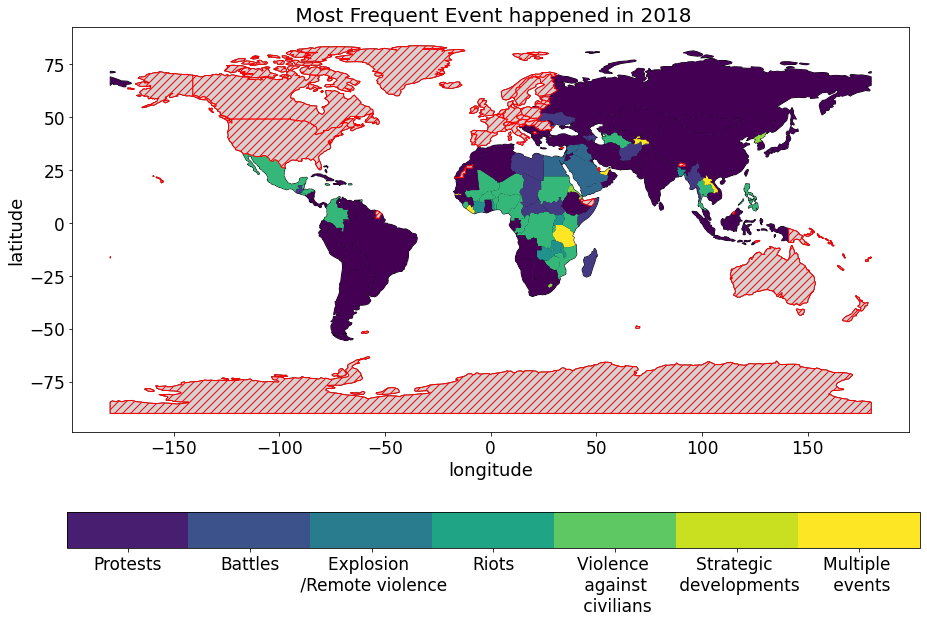

In [445]:
matplotlib.rc('xtick', labelsize=17) 
matplotlib.rc('ytick', labelsize=17)
matplotlib.rc('font', size=18)

fig,ax=plt.subplots(1,1,figsize=[15,10])
world=addMapToAx(ax)
ax.set_title(f" Most Frequent Event happened in {study_year}", fontsize = 20)
c_plot = world.plot(ax=ax,column=event_color, 
          missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values"
    })

fig = c_plot.get_figure()
cax = fig.add_axes([0.12, 0.06, 0.79, 0.05])
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=1, vmax=7))
sm._A = []
cb = fig.colorbar(sm, cax=cax, boundaries = [1,2,3,4,5,6,7,8] , orientation='horizontal')
loc = np.asarray([1.5,2.5,3.5,4.5,5.5,6.5,7.5])
cb.set_ticks(loc)
cax.set_xticklabels(['Protests', 'Battles', 'Explosion \n /Remote violence', 'Riots', 'Violence \n against \n civilians', 'Strategic \n developments', 'Multiple \n events'])
#fig.savefig(rf"plots/Most_frequent_event_happened_in_{study_year}_count.png",dpi=300,
#                   bbox_inches="tight")


In [119]:
#print(study_year)

In [120]:
#print(event)

In [118]:
##Video making, commented out for now.....

# import re
# def sorted_alphanumeric(data):
#     convert = lambda text: int(text) if text.isdigit() else text.lower()
#     alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
#     return sorted(data, key=alphanum_key)


# import cv2
# import os

# image_folder = 'plots/'
# video_name = image_folder+'2019-Strategy.avi'

# images = [img for img in sorted_alphanumeric(os.listdir(image_folder)) if img.endswith(".png")]
# frame = cv2.imread(os.path.join(image_folder, images[0]))
# height, width, layers = frame.shape

# video = cv2.VideoWriter(video_name, 0, 1, (width,height))

# for image in images:
#     video.write(cv2.imread(os.path.join(image_folder, image)))

# cv2.destroyAllWindows()
# video.release()